<a href="https://colab.research.google.com/github/Peckkie/NanoX/blob/main/Training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir( '/content/drive/MyDrive/NanoX')
!pwd 

/content/drive/MyDrive/NanoX


In [4]:
#โหลดชุดข้อมูล
import pandas as pd
file= 'NanoX_Fv_all.csv'
data = pd.read_csv(file)
data = data.drop(columns=['Unnamed: 0'])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Sheet,Y
0,113.0,118.0,118.0,107.0,105.0,109.0,92.0,95.0,104.0,96.0,90.0,98.0,92.0,90.5,95.0,94.0,89.0,99.0,99.0,92.0,97.0,103.0,100.0,95.0,0,-1
1,118.0,109.0,103.0,109.0,80.0,89.0,104.0,76.0,90.0,98.0,75.0,85.0,95.0,79.0,82.0,99.0,75.0,83.0,97.0,78.0,89.0,95.0,102.0,102.0,0,1
2,103.0,106.0,98.0,89.0,76.0,90.0,90.0,81.0,86.0,85.0,72.0,80.0,82.0,71.0,81.0,83.0,67.0,78.0,89.0,70.0,85.0,102.0,100.0,99.0,0,-1
3,98.0,110.0,101.0,90.0,88.0,94.0,86.0,84.0,96.0,80.0,69.0,93.0,81.0,68.0,87.0,78.0,70.0,87.0,85.0,70.0,88.0,99.0,96.0,91.0,0,1
4,101.0,112.0,119.0,94.0,87.0,104.0,96.0,87.0,109.0,93.0,75.0,108.0,87.0,77.0,96.0,87.0,75.0,109.0,88.0,80.0,101.0,91.0,92.0,102.0,0,-1


In [5]:
#เเบ่งชุดข้อมูล
X = data.iloc[:,0:24]
y = data.iloc[:,25]

In [6]:
#Check Class
print('Check Class','\n')
y.value_counts()

Check Class 



-1    97
 1    38
Name: Y, dtype: int64

In [7]:
print(X.shape)

(135, 24)


In [ ]:
# X_train = data.iloc[0:1354,0:2040]
# y_train = data.iloc[0:1354,2040]
# X_test = data.iloc[1354:1673,0:2040]
# y_test = data.iloc[1354:1673,2040]

# train = data.iloc[0:1355,0:2041]
# test = data.iloc[1355:1674,0:2041]
# print('Train set Size','\n')
# print(train.shape)
# print('\n','Test set Size','\n')
# print(test.shape)

## SVM model

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=5)

SVM = grid_search.fit(X, y)

In [28]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.829630,0.037771,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}"
1,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}"
2,0.829630,0.072577,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}"
3,0.829630,0.037771,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}"
4,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}"
5,0.822222,0.063721,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}"
6,0.829630,0.037771,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}"
7,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.822222,0.063721,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}"
9,0.829630,0.037771,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}"


In [29]:
# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.8296296296296296

 **print the array of mean scores only 

[0.82962963 0.71851852 0.82962963 0.82962963 0.71851852 0.82222222
 0.82962963 0.71851852 0.82222222 0.82962963 0.71851852 0.82222222
 0.74814815 0.71851852 0.82222222 0.74814815 0.71851852 0.82222222
 0.74814815 0.71851852 0.82222222 0.74814815 0.71851852 0.82222222
 0.78518519 0.71851852 0.82222222 0.78518519 0.71851852 0.82222222
 0.78518519 0.71851852 0.82222222 0.78518519 0.71851852 0.82222222
 0.81481481 0.84444444 0.82222222 0.81481481 0.77037037 0.82222222
 0.81481481 0.73333333 0.82222222 0.81481481 0.71851852 0.82222222
 0.81481481 0.84444444 0.82222222 0.81481481 0.77037037 0.82222222
 0.81481481 0.76296296 0.82222222 0.81481481 0.71851852 0.82222222]

 **examine the best model 

0.8444444444444443
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape

### Training By 15 fold coss-validation


In [33]:
train_ = data[data['Sheet'] != 0]
test_ = data[data['Sheet'] == 0]
X_train = train_.iloc[:,0:24]
y_train = train_.iloc[:,25]
X_test = test_.iloc[:,0:24]
y_test = test_.iloc[:,25]

In [37]:
for i in range(15):
    print(i)
    train_ = data[data['Sheet'] != i]
    test_ = data[data['Sheet'] == i]
    X_train = train_.iloc[:,0:24]
    y_train = train_.iloc[:,25]
    X_test = test_.iloc[:,0:24]
    y_test = test_.iloc[:,25]

    #Hyperparameter
    from sklearn import svm
    SVM = svm.SVC()
                
    modelSVM = SVM.fit(X_train, y_train)
    y_pred1 = modelSVM.predict(X_test)

    #Marking the Confusion Matrix
    from sklearn.metrics import classification_report,confusion_matrix
    # TN,FP,FN,TP = confusion_matrix(y_test, y_pred1)
    # print(TN,FP,FN,TP)
    print(confusion_matrix(y_test, y_pred1))
    print(classification_report(y_test, y_pred1))#performance

0
[[6 3]
 [0 6]]
              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         9
           1       0.67      1.00      0.80         6

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.80        15
weighted avg       0.87      0.80      0.80        15

1
[[4 0]
 [0 2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

2
[[8 0]
 [2 2]]
              precision    recall  f1-score   support

          -1       0.80      1.00      0.89         8
           1       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMe

## SVM model by Notmalization

In [81]:
sum_of_rows = X.sum(axis=1)
X_norm_array = X / sum_of_rows[:, np.newaxis]
sum(X_norm_array.iloc[4,:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


1.0

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

svm= svm.SVC()
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
grid_search = GridSearchCV(svm, param_grid, cv=5)

SVM = grid_search.fit(X_norm_array, y)

In [89]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(SVM.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}"
1,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}"
2,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}"
3,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}"
4,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}"
5,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}"
6,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}"
7,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.718519,0.018144,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}"
9,0.718519,0.018144,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}"


In [90]:
# examine the first result
print("**examine the first result","\n")

print(SVM.cv_results_['params'][0])
print(SVM.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = SVM.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(SVM.best_score_)
print(SVM.best_params_)
print(SVM.best_estimator_)

**examine the first result 

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.7185185185185186

 **print the array of mean scores only 

[0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852
 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852 0.71851852]

 **examine the best model 

0.7185185185185186
{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_fun

### Training By 15 fold coss-validation


In [35]:
train_ = data[data['Sheet'] != 0]
test_ = data[data['Sheet'] == 0]
X_train = train_.iloc[:,0:24]
y_train = train_.iloc[:,25]
X_test = test_.iloc[:,0:24]
y_test = test_.iloc[:,25]

In [38]:
for i in range(15):
    print(i)
    train_ = data[data['Sheet'] != i]
    test_ = data[data['Sheet'] == i]
    X_train = train_.iloc[:,0:24]
    y_train = train_.iloc[:,25]
    X_test = test_.iloc[:,0:24]
    y_test = test_.iloc[:,25]

    # Notmalization X
    sum_of_rows = X_train.sum(axis=1)
    X_train = X_train / sum_of_rows[:, np.newaxis]
    sum_of_rows = X_test.sum(axis=1)
    X_test = X_test / sum_of_rows[:, np.newaxis]

    #Hyperparameter
    from sklearn import svm
    SVM = svm.SVC()
                
    modelSVM = SVM.fit(X_train, y_train)
    y_pred1 = modelSVM.predict(X_test)

    #Marking the Confusion Matrix
    from sklearn.metrics import classification_report,confusion_matrix
    # TN,FP,FN,TP = confusion_matrix(y_test, y_pred1)
    # print(TN,FP,FN,TP)
    print(confusion_matrix(y_test, y_pred1));
    print(classification_report(y_test, y_pred1));#performance

0
[[6 3]
 [0 6]]
              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         9
           1       0.67      1.00      0.80         6

    accuracy                           0.80        15
   macro avg       0.83      0.83      0.80        15
weighted avg       0.87      0.80      0.80        15

1
[[4 0]
 [0 2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

2
[[8 0]
 [2 2]]
              precision    recall  f1-score   support

          -1       0.80      1.00      0.89         8
           1       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to 

## Random forest model

In [8]:
# n_estimators = [100, 300, 500, 800, 1200]
# n_estimators = [800,850,900,950,1000]
# n_estimators = [100]
max_depth = [5]
min_samples_split = [2]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state = 1)

hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
#hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.0s finished


In [9]:
# # examine the first result
# print("**examine the first result","\n")

# print(bestF.cv_results_['params'][0])
# print(bestF.cv_results_['mean_test_score'][0])

# # print the array of mean scores only
# print("\n","**print the array of mean scores only","\n")

# grid_mean_scores = bestF.cv_results_['mean_test_score']
# print(grid_mean_scores)

# # examine the best model
# print("\n","**examine the best model","\n")

# print(bestF.best_score_)
# print(bestF.best_params_)
# print(bestF.best_estimator_)

#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 800}
Best score is 0.9109890109890111


In [ ]:
# {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 800}

### Training By 15 fold coss-validation

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Sheet,Y
0,113.0,118.0,118.0,107.0,105.0,109.0,92.0,95.0,104.0,96.0,90.0,98.0,92.0,90.5,95.0,94.0,89.0,99.0,99.0,92.0,97.0,103.0,100.0,95.0,0,-1
1,118.0,109.0,103.0,109.0,80.0,89.0,104.0,76.0,90.0,98.0,75.0,85.0,95.0,79.0,82.0,99.0,75.0,83.0,97.0,78.0,89.0,95.0,102.0,102.0,0,1
2,103.0,106.0,98.0,89.0,76.0,90.0,90.0,81.0,86.0,85.0,72.0,80.0,82.0,71.0,81.0,83.0,67.0,78.0,89.0,70.0,85.0,102.0,100.0,99.0,0,-1
3,98.0,110.0,101.0,90.0,88.0,94.0,86.0,84.0,96.0,80.0,69.0,93.0,81.0,68.0,87.0,78.0,70.0,87.0,85.0,70.0,88.0,99.0,96.0,91.0,0,1
4,101.0,112.0,119.0,94.0,87.0,104.0,96.0,87.0,109.0,93.0,75.0,108.0,87.0,77.0,96.0,87.0,75.0,109.0,88.0,80.0,101.0,91.0,92.0,102.0,0,-1


In [21]:
train_ = data[data['Sheet'] != 0]
test_ = data[data['Sheet'] == 0]
X_train = train_.iloc[:,0:24]
y_train = train_.iloc[:,25]
X_test = test_.iloc[:,0:24]
y_test = test_.iloc[:,25]

In [26]:
for i in range(15):
    print(i)
    train_ = data[data['Sheet'] != i]
    test_ = data[data['Sheet'] == i]
    X_train = train_.iloc[:,0:24]
    y_train = train_.iloc[:,25]
    X_test = test_.iloc[:,0:24]
    y_test = test_.iloc[:,25]

    forestOpt = RandomForestClassifier(random_state = 1, max_depth = 5, n_estimators = 800, min_samples_split =2)          
    modelOpt = forestOpt.fit(X_train, y_train)
    y_pred1 = modelOpt.predict(X_test)

    #Marking the Confusion Matrix
    from sklearn.metrics import classification_report,confusion_matrix
    # TN,FP,FN,TP = confusion_matrix(y_test, y_pred1)
    # print(TN,FP,FN,TP)
    print(confusion_matrix(y_test, y_pred1))
    print(classification_report(y_test, y_pred1))#performance

0
[[9 0]
 [0 6]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

1
[[4 0]
 [2 0]]
              precision    recall  f1-score   support

          -1       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

2


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[8 0]
 [1 3]]
              precision    recall  f1-score   support

          -1       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12

3
[[6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

4
[[6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

5
[[3 0]
 [2 1]]
              precision    recall  f1-score   support

          -1       0.60 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[8 1]
 [0 0]]
              precision    recall  f1-score   support

          -1       1.00      0.89      0.94         9
           1       0.00      0.00      0.00         0

    accuracy                           0.89         9
   macro avg       0.50      0.44      0.47         9
weighted avg       1.00      0.89      0.94         9

8


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[9 0]
 [0 3]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

9
[[9]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

10
[[12  0]
 [ 3  1]]
              precision    recall  f1-score   support

          -1       0.80      1.00      0.89        12
           1       1.00      0.25      0.40         4

    accuracy                           0.81        16
   macro avg       0.90      0.62      0.64        16
weighted avg       0.85      0.81      0.77        16

11
[[7 2]
 [0 0]]
          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[9]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

13
[[12]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

14
[[4]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Random forest model by Notmalization

In [94]:
sum_of_rows = X.sum(axis=1)
X_norm_array = X / sum_of_rows[:, np.newaxis]
sum(X_norm_array.iloc[4,:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


1.0

In [95]:
#n_estimators = [100, 300, 500, 800, 1200]
n_estimators = [100]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state = 1)

hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
#hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_norm_array, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   31.9s finished


In [96]:
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best score is 0.8868131868131869


### Training By 15 fold coss-validation

In [29]:
import  numpy as np
train_ = data[data['Sheet'] != 0]
test_ = data[data['Sheet'] == 0]
X_train = train_.iloc[:,0:24]
y_train = train_.iloc[:,25]
X_test = test_.iloc[:,0:24]
y_test = test_.iloc[:,25]

In [39]:
for i in range(15):
    print(i)
    train_ = data[data['Sheet'] != i]
    test_ = data[data['Sheet'] == i]
    X_train = train_.iloc[:,0:24]
    y_train = train_.iloc[:,25]
    X_test = test_.iloc[:,0:24]
    y_test = test_.iloc[:,25]

    # Notmalization X
    sum_of_rows = X_train.sum(axis=1)
    X_train = X_train / sum_of_rows[:, np.newaxis]
    sum_of_rows = X_test.sum(axis=1)
    X_test = X_test / sum_of_rows[:, np.newaxis]

    forestOpt = RandomForestClassifier(random_state = 1, max_depth = 5, n_estimators = 100, min_samples_split =5)          
    modelOpt = forestOpt.fit(X_train, y_train);
    y_pred1 = modelOpt.predict(X_test);

    #Marking the Confusion Matrix
    from sklearn.metrics import classification_report,confusion_matrix
    # TN,FP,FN,TP = confusion_matrix(y_test, y_pred1)
    # print(TN,FP,FN,TP)
    print(confusion_matrix(y_test, y_pred1));
    print(classification_report(y_test, y_pred1));#performance

0
[[7 2]
 [3 3]]
              precision    recall  f1-score   support

          -1       0.70      0.78      0.74         9
           1       0.60      0.50      0.55         6

    accuracy                           0.67        15
   macro avg       0.65      0.64      0.64        15
weighted avg       0.66      0.67      0.66        15

1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to 

[[4 0]
 [0 2]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

2
[[8 0]
 [2 2]]
              precision    recall  f1-score   support

          -1       0.80      1.00      0.89         8
           1       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87      0.83      0.81        12

3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to 

[[0 0]
 [2 4]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         6

    accuracy                           0.67         6
   macro avg       0.50      0.33      0.40         6
weighted avg       1.00      0.67      0.80         6

4
[[0 0]
 [3 3]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         6

    accuracy                           0.50         6
   macro avg       0.50      0.25      0.33         6
weighted avg       1.00      0.50      0.67         6

5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

[[3 0]
 [3 0]]
              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6

6
[[4]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

7


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

[[8 1]
 [0 0]]
              precision    recall  f1-score   support

          -1       1.00      0.89      0.94         9
           1       0.00      0.00      0.00         0

    accuracy                           0.89         9
   macro avg       0.50      0.44      0.47         9
weighted avg       1.00      0.89      0.94         9

8
[[9 0]
 [1 2]]
              precision    recall  f1-score   support

          -1       0.90      1.00      0.95         9
           1       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.95      0.83      0.87        12
weighted avg       0.92      0.92      0.91        12

9


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed i

[[9]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

10
[[12  0]
 [ 4  0]]
              precision    recall  f1-score   support

          -1       0.75      1.00      0.86        12
           1       0.00      0.00      0.00         4

    accuracy                           0.75        16
   macro avg       0.38      0.50      0.43        16
weighted avg       0.56      0.75      0.64        16

11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

[[5 4]
 [0 0]]
              precision    recall  f1-score   support

          -1       1.00      0.56      0.71         9
           1       0.00      0.00      0.00         0

    accuracy                           0.56         9
   macro avg       0.50      0.28      0.36         9
weighted avg       1.00      0.56      0.71         9

12
[[9]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

13


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed i

[[12]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

14
[[4]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


## confusion matrix:

Text(0.5, 21.5, 'Predicted label')

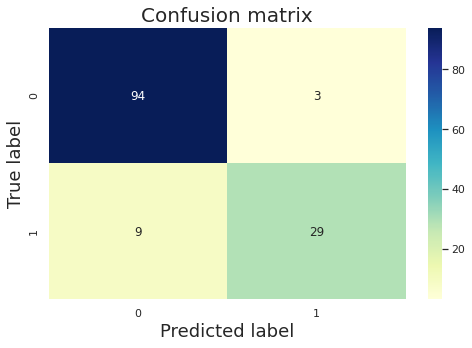

In [46]:
# RF ปกติ
import matplotlib.pyplot as plt
import seaborn as sns
cm = [[94, 3], [9, 29]]
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

Text(0.5, 21.5, 'Predicted label')

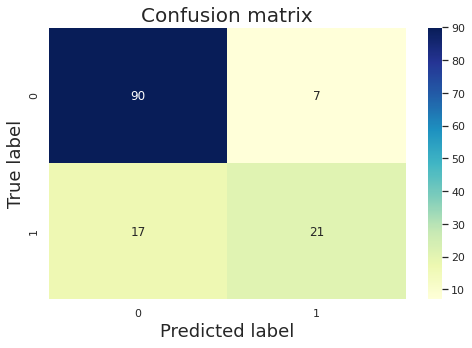

In [47]:
# RF normal
import matplotlib.pyplot as plt
import seaborn as sns
cm = [[90,	7],	[17,	21]]
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

Text(0.5, 21.5, 'Predicted label')

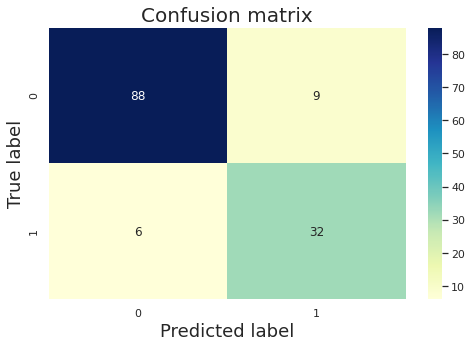

In [49]:
# SVM ปกติ
import matplotlib.pyplot as plt
import seaborn as sns
cm = [[88,	9],	[6,	32]]
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

Text(0.5, 21.5, 'Predicted label')

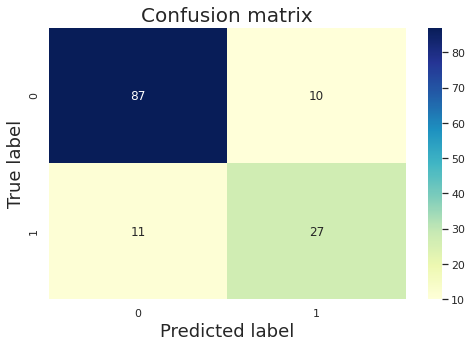

In [48]:
# SVM normal
import matplotlib.pyplot as plt
import seaborn as sns
cm = [[87,10],[11,27]]
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)